In [82]:
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt

# Import

First we open a file containing a dictionary of columns and associated data types generated in `../../optimize/`, then we read input file.

In [83]:
with open('../input/dtypes.yaml', 'r') as yamlfile:
    column_types = yaml.load(yamlfile)

read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'dtype': column_types,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

df = pd.read_csv('../input/ice-air.csv.gz', **read_csv_opts)

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763020 entries, 0 to 1763019
Data columns (total 44 columns):
Status                  category
Sex                     category
Convictions             category
GangMember              category
ClassLvl                float32
Age                     float32
MissionDate             datetime64[ns]
MissionNumber           uint32
PULOC                   category
DropLoc                 category
StrikeFromList          float32
ReasonStruck            category
R-T                     category
Code                    category
CountryOfCitizenship    category
Juvenile                bool
MissionWeek             uint8
MissionQuarter          uint8
MissionYear             uint16
MissionMonth            uint8
Criminality             category
FamilyUnitFlag          float32
UnaccompaniedFlag       float32
AlienMasterID           uint32
MissionID               uint16
air_AirportID           float32
air_AirportName         category
air_City         

In [84]:
with open('../input/airport_dict.yaml', 'r') as yamlfile:
    airport_dict = yaml.load(yamlfile)

# Airport report

For a given airport ICAO code represented in the ICE Air data, output a uniform set of variables, tables, and figures.

In [85]:
airport = 'KMSP'
if airport.upper() in airport_dict.keys():
    pass
else:
    print(f'{airport} not represented in dataset')
airport_name = airport_dict[airport]

In [86]:
pickup = df['PULOC'] == airport
dropoff = df['DropLoc'] == airport

In [87]:
pickup_df = df[pickup]
dropoff_df = df[dropoff]

In [88]:
pickup_df.to_csv(f'../output/{airport}_pickups.csv')
dropoff_df.to_csv(f'../output/{airport}_dropoffs.csv')

In [89]:
airport_all = pd.concat([pickup_df, dropoff_df]).drop_duplicates()

In [90]:
airport_all['MissionID'].nunique()

307

In [91]:
airport_all.groupby(['MissionDate', 'MissionID', 'PULOC', 'DropLoc'])['AlienMasterID'].nunique()

MissionDate  MissionID  PULOC  DropLoc
2010-10-06   150        KMSP   KAEX       14
                               KLRD       43
2010-10-13   177        KMSP   KAEX       26
                               KLRD       30
2010-10-20   213        KMSP   KAEX       21
                               KLRD       41
2010-11-03   300        KAEX   KMSP        2
                        KMSP   KAEX       17
                               KLRD       62
2010-11-10   334        KAEX   KMSP        2
                        KMSP   KAEX        5
                               KLRD       39
2010-11-17   354        KMSP   KAEX       26
                               KLRD       27
2010-11-24   394        KMSP   KAEX        3
                               KHRL        1
                               KLRD       33
2010-12-01   444        KMSP   KAEX       11
                               KLRD       27
2010-12-09   478        KMSP   KAEX        6
                               KLRD       49
2010-12-15   518

In [92]:
pickup_df.set_index('MissionDate', inplace=True)
dropoff_df.set_index('MissionDate', inplace=True)

In [93]:
unique_pickups = len(set(pickup_df['AlienMasterID']))
unique_dropoffs = len(set(dropoff_df['AlienMasterID']))
print(f'{unique_pickups} pickups, {unique_dropoffs} dropoffs.')

12158 pickups, 655 dropoffs.


In [143]:
unique_pickup_flights = len(set(pickup_df['MissionID']))
unique_dropoff_flights = len(set(dropoff_df['MissionID']))
print(f'{unique_pickup_flights} pickup flights, {unique_dropoff_flights} dropoff flights.')

301 pickup flights, 82 dropoff flights.


In [94]:
unique_pickups + unique_dropoffs

12813

In [95]:
weekly_pickups = pickup_df['AlienMasterID'].resample('W').nunique()
weekly_dropoffs = dropoff_df['AlienMasterID'].resample('W').nunique()
monthly_pickups = pickup_df['AlienMasterID'].resample('M').nunique()
monthly_dropoffs = dropoff_df['AlienMasterID'].resample('M').nunique()
monthly_pickup_flights = pickup_df['MissionID'].resample('M').nunique()
monthly_dropoff_flights = dropoff_df['MissionID'].resample('M').nunique()
annual_pickups = pickup_df['AlienMasterID'].resample('AS-OCT').nunique()
annual_dropoffs = dropoff_df['AlienMasterID'].resample('AS-OCT').nunique()
annual_pickup_flights = pickup_df['MissionID'].resample('AS-OCT').nunique()
annual_dropoff_flights = dropoff_df['MissionID'].resample('AS-OCT').nunique()

In [96]:
monthly_pickups.mean()

122.8080808080808

In [97]:
monthly_dropoffs.mean()

6.683673469387755

# Annual trends (by fiscal year)

In [98]:
annual_pickups.rename('Total pickups', inplace=True)
annual_pickups

MissionDate
2010-10-01    2505
2011-10-01    2070
2012-10-01    1638
2013-10-01    1241
2014-10-01     785
2015-10-01     770
2016-10-01    1248
2017-10-01    1592
2018-10-01     309
Freq: AS-OCT, Name: Total pickups, dtype: int64

In [99]:
annual_dropoffs.rename('Total dropoffs', inplace=True)
annual_dropoffs

MissionDate
2010-10-01     10
2011-10-01      4
2012-10-01     13
2013-10-01    267
2014-10-01     43
2015-10-01    130
2016-10-01     62
2017-10-01     48
2018-10-01     78
Freq: AS-OCT, Name: Total dropoffs, dtype: int64

In [100]:
annual_pickup_flights.rename('Total pickup flights', inplace=True)
annual_pickup_flights

MissionDate
2010-10-01    50
2011-10-01    51
2012-10-01    35
2013-10-01    32
2014-10-01    18
2015-10-01    25
2016-10-01    30
2017-10-01    49
2018-10-01    11
Freq: AS-OCT, Name: Total pickup flights, dtype: int64

In [101]:
annual_dropoff_flights.rename('Total dropoff flights', inplace=True)
annual_dropoff_flights

MissionDate
2010-10-01     5
2011-10-01     3
2012-10-01     8
2013-10-01    13
2014-10-01     6
2015-10-01     9
2016-10-01    15
2017-10-01    18
2018-10-01     5
Freq: AS-OCT, Name: Total dropoff flights, dtype: int64

In [139]:
annual_summary = pd.DataFrame({'Annual Pickups': annual_pickups,
              'Annual Pickup Flights': annual_pickup_flights,
              'Annual Dropoffs': annual_dropoffs,
             ' Annual Pickup Flights': annual_dropoff_flights,})

In [140]:
annual_summary.index = annual_summary.index.year+1 
annual_summary.index.name = 'FiscalYear'

In [142]:
annual_summary.to_csv(f'../output/{airport}_annual_summary.csv')

In [102]:
sum(annual_pickup_flights) + sum(annual_dropoff_flights)

383

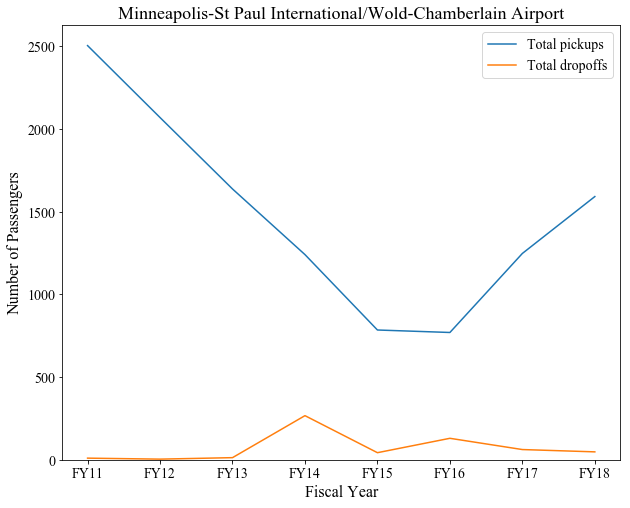

In [103]:
def pickup_dropoff_trend(data):
    
    fig, ax = plt.subplots()
    
    for datum in data:
        ax = datum.plot(legend=True)
    
    ax.set_ylabel('Number of Passengers', fontsize=16)
    ax.set_ylim(0)
    ax.set_xticklabels([f'FY{str(x)[2:4]}' for x in range(2010,2019)])
    ax.set_xlabel('Fiscal Year', fontsize=16)
    ax.set_title(f'{airport_name}', fontsize=18)
    ax.tick_params(labelsize=14)
    ax.legend(fontsize=14)
    
    fig.set_size_inches(10, 8)
    fig.savefig(f'../output/{airport}-ICE-Air-Passengers.png', dpi=100)
    return fig, ax

plot = pickup_dropoff_trend([annual_pickups['2010':'2017'], annual_dropoffs['2010':'2017']]);

# Annual pickup rate, by criminal conviction status

In [104]:
annual_non_criminal = pickup_df[['NonCriminal']].resample('AS-OCT').sum()

In [105]:
annual_non_criminal['total'] = annual_pickups
annual_non_criminal['percent'] = annual_non_criminal['NonCriminal']/annual_pickups*100

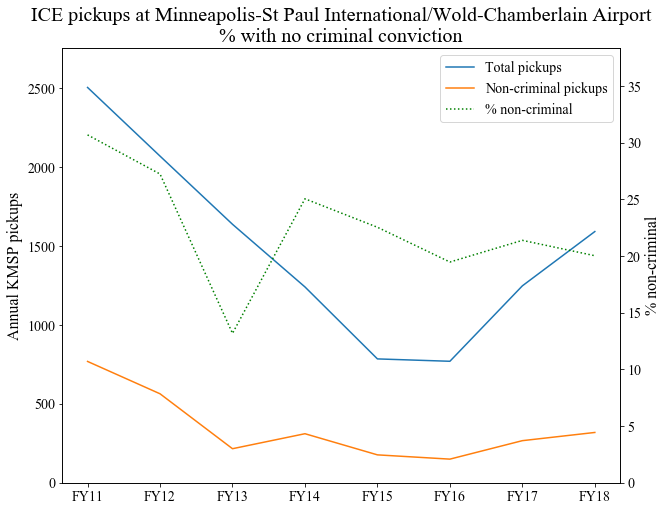

In [106]:
annual_data = annual_non_criminal['2010':'2017']
annual_data.index = [f'FY{str(x)[2:4]}' for x in range(2011,2019)]

plt.style.use([{'legend.frameon': True}])
plt.rc("font", family="Times New Roman")

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

lns1 = ax1.plot(annual_data['total'], label='Total pickups')
lns2 = ax1.plot(annual_data['NonCriminal'], label='Non-criminal pickups')
ax1_max = annual_data['total'].max()
ax1.set_ylim(0, (ax1_max * 1.1))
ax1.set_ylabel(f'Annual {airport} pickups', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

lns3 = ax2.plot(annual_data['percent'], label='% non-criminal', linestyle=':', color='green')
ax2_max = annual_data['percent'].max()
ax2.set_ylim(0, (ax2_max * 1.25))
ax2.set_ylabel('% non-criminal', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
# ax2.set_xticklabels([f'FY{str(x)[2:4]}' for x in range(2011,2019)])

lns = [lns1[0], lns2[0], lns3[0]]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize=14)

ax1.set_title(f'ICE pickups at {airport_name}\n% with no criminal conviction', fontsize=20)

fig.set_size_inches(10, 8)

plt.show()
fig.savefig(f'../output/{airport}_NoCrim.png', dpi=100)

# Monthly averages (by calendar year)

In [107]:
monthly_means = pd.DataFrame()
for year in range(2010, 2019):
    mean_pickups = monthly_pickups[f'{year}'].mean()
    mean_pickup_flights = monthly_pickup_flights[f'{year}'].mean()
    mean_dropoffs = monthly_dropoffs[f'{year}'].mean()
    mean_dropoff_flights = monthly_dropoff_flights[f'{year}'].mean()
    monthly_means = monthly_means.append({'calendar_year':year,
                                          'monthly_mean_pickups':mean_pickups,
                                          'monthly_mean_dropoffs':mean_dropoffs,
                                          'monthly_mean_pickup_flights':mean_pickup_flights,
                                          'monthly_mean_dropoff_flights':mean_dropoff_flights,
                                         }, ignore_index=True)
monthly_means['calendar_year'] = monthly_means['calendar_year'].astype(int)
monthly_means = monthly_means.set_index('calendar_year')

In [108]:
monthly_means.round(2)

,monthly_mean_dropoff_flights,monthly_mean_dropoffs,monthly_mean_pickup_flights,monthly_mean_pickups
calendar_year,,,,
2010,1.00,2.00,4.00,218.33
2011,0.25,0.50,4.25,201.42
2012,0.50,1.00,4.17,162.50
2013,0.67,0.75,2.67,124.67
2014,0.83,21.92,2.17,92.92
2015,0.58,8.00,1.75,63.25
2016,0.92,7.25,2.17,71.33
2017,1.33,5.75,2.83,115.25
2018,1.58,9.08,4.08,127.25


In [109]:
monthly_means.to_csv(f'../output/{airport}_monthly_means.csv')

# Top nationalities

In [147]:
pickup_df.drop_duplicates(subset='AlienMasterID')['CountryOfCitizenship'].value_counts().head(10)

MEXICO         8176
GUATEMALA      1480
HONDURAS        796
EL SALVADOR     736
ECUADOR         289
SOMALIA         186
NICARAGUA       116
LIBERIA          67
SOUTH SUDAN      39
CAMBODIA         33
Name: CountryOfCitizenship, dtype: int64

In [112]:
dropoff_df.drop_duplicates(subset='AlienMasterID')['CountryOfCitizenship'].value_counts().head(5)

EL SALVADOR    161
CHINA           47
SOMALIA         47
HONDURAS        45
MEXICO          44
Name: CountryOfCitizenship, dtype: int64

In [113]:
airport_all.drop_duplicates(subset='AlienMasterID')['CountryOfCitizenship'].value_counts().head(5)

MEXICO         8220
GUATEMALA      1515
EL SALVADOR     897
HONDURAS        841
ECUADOR         322
Name: CountryOfCitizenship, dtype: int64

In [114]:
airport_all.set_index('MissionDate', inplace=True)

# Chart of top nationalities per year

This chart shows the top five `CountryOfCitizenship` values for each fiscal year. It can be misleading because values are summed in "ALL OTHERS" for years in which a particular nationalitiy is not in the top 5, but it makes clear things like which years certain groups come into or leave the top 5.

Charts can be generated for pickups, dropoffs, or all records; this could also be reworked to focus on removal or transfer flights.

In [115]:
# Change groupby to `dropoff_df` to get table/figure of dropoff nationalities
# g = pickup_df.groupby(['PULOC', pd.Grouper(freq='AS-OCT', sort=True), 'CountryOfCitizenship'])['AlienMasterID', 'MissionID'].nunique()
g = airport_all.groupby([pd.Grouper(freq='AS-OCT', sort=True), 'CountryOfCitizenship'])['AlienMasterID', 'MissionID'].nunique()
country_of_citizenship_by_year = g.reset_index()
country_of_citizenship_by_year.rename({'MissionDate': 'FY'}, axis='columns', inplace=True)

# country_of_citizenship_by_year.to_csv(f'../output/{airport}_country_of_citizenship_by_year.csv', index=True)

In [116]:
country_of_citizenship_by_year.set_index('FY', inplace=True)

In [117]:
country_of_citizenship_by_year.sort_values(by='AlienMasterID', ascending=False, inplace=True)

In [118]:
top_5_df = pd.DataFrame()

for year in country_of_citizenship_by_year.index.unique():
    temp = country_of_citizenship_by_year.loc[f'{year}'][['CountryOfCitizenship', 'AlienMasterID']]
    temp_top_5 = temp[0:5]
    if len(temp) > 5:
        all_other_count = sum(temp['AlienMasterID'][5:])
    else:
        all_other_count = 0
    other_df = pd.DataFrame([['ALL OTHERS', all_other_count]], columns=['CountryOfCitizenship', 'AlienMasterID'], index=[year])
    temp_top_5 = temp_top_5.append(other_df)
    top_5_df = top_5_df.append(temp_top_5)

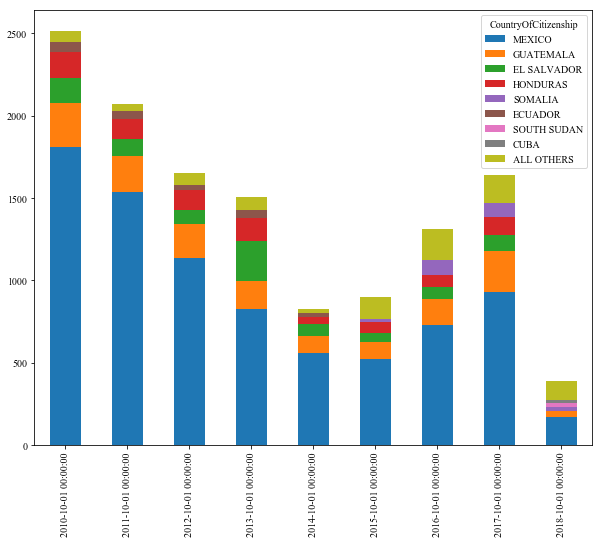

In [119]:
pivot = pd.pivot_table(data=top_5_df,
                       index=top_5_df.index,
                       columns='CountryOfCitizenship',
                       values='AlienMasterID',
                       aggfunc=np.sum,
                       fill_value=0)

pivot = pivot.reindex(pivot.sum().sort_values(ascending=False).index, axis=1)
cols = list(pivot.columns)
cols.remove('ALL OTHERS')
cols.append('ALL OTHERS')
pivot = pivot[cols]

fig = pivot.plot(kind='bar', stacked=True, figsize=(10, 8))

In [120]:
pivot

CountryOfCitizenship,MEXICO,GUATEMALA,EL SALVADOR,HONDURAS,SOMALIA,ECUADOR,SOUTH SUDAN,CUBA,ALL OTHERS
2010-10-01,1812,268,148,157,0,63,0,0,67
2011-10-01,1536,220,103,119,0,51,0,0,45
2012-10-01,1139,207,83,119,0,30,0,0,73
2013-10-01,827,169,243,139,0,49,0,0,81
2014-10-01,559,103,75,43,0,20,0,0,28
2015-10-01,521,104,55,68,18,0,0,0,134
2016-10-01,729,159,74,74,89,0,0,0,185
2017-10-01,928,249,102,109,81,0,0,0,171
2018-10-01,169,36,0,0,28,0,21,18,115


In [121]:
g = pickup_df.groupby(['PULOC', pd.Grouper(freq='AS-OCT', sort=True), 'air2_AirportName'])['AlienMasterID','MissionID'].nunique()
drop_locs_by_year = g.reset_index()
drop_locs_by_year.rename({'MissionDate': 'FY'}, axis='columns', inplace=True)

# drop_locs_by_year.to_csv(f'../output/{airport}_drop_locs_by_year.csv', index=True)

# Alternate plot of top nationalities

Since selecting top 5 for each year is a bit counterintuitive, we can instead select here an aribtrary set of nationalities to display for all years, while summing others. This can be based on most common values or could be some other arbitrary list.

Currently set up to focus on pickups but could be reworked for dropoffs, all passengers, or removals/transfers.

In [170]:
annual = pickup_df.groupby([pd.Grouper(freq='AS-OCT', sort=True), 'CountryOfCitizenship'])['AlienMasterID'].nunique()
# annual = dropoff_df.groupby([pd.Grouper(freq='AS-OCT', sort=True), 'CountryOfCitizenship'])['AlienMasterID'].nunique()
# annual = airport_all.groupby([pd.Grouper(freq='AS-OCT', sort=True), 'CountryOfCitizenship'])['AlienMasterID'].nunique()

In [171]:
annual = annual.reset_index()
annual.set_index('MissionDate', inplace=True)

In [172]:
top6 = list(annual.groupby(['CountryOfCitizenship'])['AlienMasterID'].sum().sort_values(ascending=False).head(6).index)

top_6_df = pd.DataFrame()
top_6_df = top_6_df.append(annual[annual['CountryOfCitizenship'].isin(top6)])
top_6_df.index = top_6_df.index.year

for year in annual.index.year.unique():
    temp = annual[f'{year}']
    temp2 = temp[~temp['CountryOfCitizenship'].isin(top6)]
    all_other_count = temp2['AlienMasterID'].sum()
    other_df = pd.DataFrame([['ALL OTHERS', all_other_count]],
                            columns=['CountryOfCitizenship',
                                     'AlienMasterID'],
                            index=[year])
    top_6_df = top_6_df.append(other_df)

top_6_df.sort_index(inplace=True)
top_6_df.index = [f'FY{str(x)[2:4]}' for x in top_6_df.index + 1]

top_6_df['CountryOfCitizenship'] = top_6_df['CountryOfCitizenship'].astype('category')

top_6_data = pd.pivot_table(data=top_6_df,
                       index=top_6_df.index,
                       columns='CountryOfCitizenship',
                       values='AlienMasterID',
                       aggfunc=np.sum,
                       fill_value=0)
top_6_data = top_6_data.reindex(top_6_data.sum().sort_values(ascending=False).index, axis=1)
cols = list(top_6_data.columns)
cols.remove('ALL OTHERS')
cols.append('ALL OTHERS')
top_6_data = top_6_data[cols]

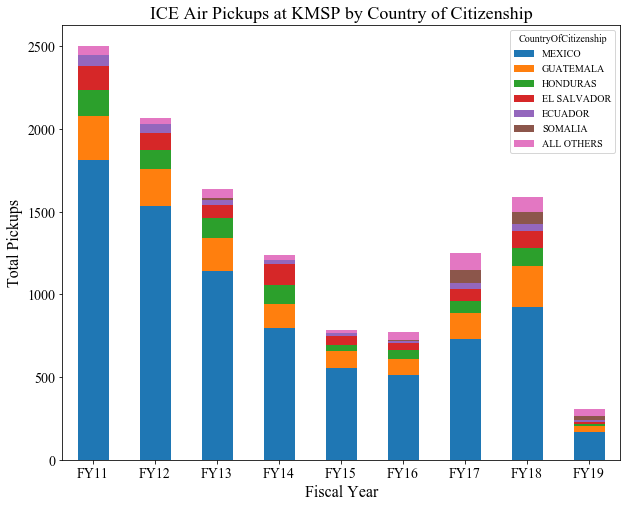

In [173]:
def country_of_citizenship_trend(data, title=str, xlabel=str, ylabel=str):
    
    fig, ax = plt.subplots()
    
    data.plot(kind='bar', stacked=True, legend=True, ax=ax)

    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_title(title, fontsize=18)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=0)

    filename = title.replace(' ', '-')
    fig.set_size_inches(10, 8)
    fig.savefig(f'../output/{filename}.png', dpi=100)
    return fig, ax

country_of_citizenship_trend(top_6_data,
                             title=f'ICE Air Pickups at {airport} by Country of Citizenship',
                             ylabel='Total Pickups',
                             xlabel='Fiscal Year');

# Juveniles (by fiscal year)

Chart of just juveniles for pickups, dropoffs. Currently will fail if no juveniles.

In [127]:
g = pickup_df.groupby(['PULOC', pd.Grouper(freq='AS-OCT', sort=True), 'Juvenile'])['AlienMasterID'].nunique()
juvenile_pickups = g.unstack()
juvenile_pickups['percent'] = juvenile_pickups[True] / juvenile_pickups[False] * 100
juvenile_pickups

Juvenile            False  True   percent
PULOC MissionDate                        
KMSP  2010-10-01   2501.0   4.0  0.159936
      2011-10-01   2069.0   1.0  0.048333
      2012-10-01   1638.0   NaN       NaN
      2013-10-01   1241.0   NaN       NaN
      2014-10-01    785.0   NaN       NaN
      2015-10-01    770.0   NaN       NaN
      2016-10-01   1248.0   NaN       NaN
      2017-10-01   1592.0   NaN       NaN
      2018-10-01    309.0   NaN       NaN

In [174]:
g = dropoff_df.groupby(['DropLoc', pd.Grouper(freq='AS-OCT', sort=True), 'Juvenile'])['AlienMasterID'].nunique()
juvenile_pickups = g.unstack()

In [175]:
juvenile_pickups

Juvenile             False
DropLoc MissionDate       
KMSP    2010-10-01      10
        2011-10-01       4
        2012-10-01      13
        2013-10-01     267
        2014-10-01      43
        2015-10-01     130
        2016-10-01      62
        2017-10-01      48
        2018-10-01      78

In [ ]:
juvenile_pickups['percent'] = juvenile_pickups[True] / juvenile_pickups[False] * 100
juvenile_pickups